FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series, it faithfully reproduces the characteristics of real players.

**The highlight of this kernel is Player Scouting**



<img src="https://media.altchar.com/prod/images/940_530/gm-3bb95784-b380-4bb3-988c-9725167b479e-fifa19.jpeg">


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ipywidgets
from ipywidgets import interact
import ipywidgets as widgets
!pip install apyori
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from math import pi

In [ ]:
fifa_data = pd.read_csv('../input/fifa19/data.csv')

# Glimpse of the data

In [ ]:
fifa_data

<img src="https://cdn.mos.cms.futurecdn.net/FSuDZonyzwLVmxMZnvdVBm.jpg">


In [ ]:
fifa_data.describe()

In [ ]:
fifa_data.columns

# Data Cleaning

Dropping columns

In [ ]:
fifa_data = fifa_data.drop(columns=["Photo","Flag","Club Logo","Unnamed: 0","Body Type","Special","Real Face", "ID", "LS", "ST", "RS", 
                        "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", 
                        "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB"],axis=1)

Handling missing values

In [ ]:
fifa_data.isnull().sum()

In [ ]:
fifa_data["Club"].fillna("Free Agent", inplace = True)
fifa_data["Release Clause"].fillna("No Release Clause", inplace = True)
fifa_data = fifa_data.dropna(axis=0, subset=['Position'])
fifa_data["Joined"].fillna("N/A", inplace = True)
fifa_data["Loaned From"].fillna("Not on loan", inplace = True)
fifa_data["Contract Valid Until"].fillna("Free Agent", inplace = True)

In [ ]:
fifa_data.isnull().sum()

# Data Visualization

Player overall histogram

In [ ]:
plt.hist(fifa_data['Overall'], color='blue') 

Player potential histogram

In [ ]:
plt.hist(fifa_data['Potential'], color='red')

Player Age vs Overall vs Potential

In [ ]:
sns.set(style="whitegrid")
sns.relplot(
    data = fifa_data,
    x="Age",y="Overall",hue="Potential")

No. of players for each position

In [ ]:
position_count = fifa_data['Position'].value_counts()
plt.figure(figsize=(20,15))
sns.barplot(position_count.values,position_count.index,  alpha=0.8)
plt.title('No. of players by position')
plt.ylabel('Position', fontsize=12)
plt.xlabel('Players', fontsize=12)

Player nationality 

In [ ]:
fifa_data.Nationality.nunique()

The game features players from 164 nations


**Top 20 nations with most players**

In [ ]:
nation_count = fifa_data['Nationality'].value_counts()
nation_count = nation_count[0:20]
plt.figure(figsize=(20,15))
sns.barplot(nation_count.values,nation_count.index,  alpha=0.8)
plt.title('Player Nationality')
plt.ylabel('Nationality', fontsize=12)
plt.xlabel('Players', fontsize=12)

Club players

In [ ]:
fifa_data.Club.nunique()

The game has 652 players

**Clubs with most players**

In [ ]:
club_count = fifa_data['Club'].value_counts()
club_count = club_count[1:21]
plt.figure(figsize=(20,15))
sns.barplot(club_count.values,club_count.index,  alpha=0.8)
plt.title('Player Clubs')
plt.ylabel('Club', fontsize=12)
plt.xlabel('Players', fontsize=12)

Heatmap

In [ ]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(fifa_data[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='Reds')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

# League Analysis

Adding the league in which the player plays on the basis of club

In [ ]:
SAF = ["Aldosivi", "Argentinos Jrs.", "Atlético Tucumán", "Banfield","Belgrano","Buenos Aires","Colón","Defensa","Estudiantes","Gimnasia","Godoy Cruz",
"Huracán","Independiente","Lanús","Newell's","Patronato","Racing Club","River Plate","Rosario Central","San Lorenzo","San Martín","SM Tucumán","Talleres",
"Tigre","Unión","Vélez Sarsfield", "Boca Juniors", "Club Atlético Huracán"]
HYUNDAI_A_LEAGUE = ["Adelaide United","Brisbane Roar","Central Coast","Melb. Victory","Melbourne City","Newcastle Jets","Perth Glory","Sydney FC","Well. Phoenix","WS Wanderers",
                    "Melbourne Victory"]
O_BUNDESLIGA = ["Admira Wacker","FK Austria Wien","Innsbruck","LASK Linz","RB Salzburg","SCR Altach","SK Rapid Wien","SK Sturm Graz","SKN St. Pölten","SV Mattersburg",
                "TSV Hartberg","Wolfsberger AC", "FC Red Bull Salzburg"]
PRO_LEAGUE = ["Cercle Brugge","Club Brugge","Excel Mouscron","KAA Gent","KAS Eupen","KRC Genk","KV Kortrijk","KV Oostende","Royal Antwerp FC","RSC Anderlecht",
              "Sint-Truiden","Sp. Charleroi","Sport. Lokeren","Standard Liège","Waasl. Beveren","Zulte-Waregem", "Club Brugge KV", "Standard de Liège"]
LIGA_DO_BRASIL = ["América""Atl. Paranaense","Atlético Mineiro","Bahia","Botafogo","Ceará SC","Chapecoense","Cruzeiro","Fluminense","Grêmio","Internacional","Paraná",
                  "Santos","Sport","Vitória"]
CAMP_SCOTIABANK = ["Audax Italiano","CD Antofagasta","CD Huachipato","CD O'Higgins","CD Palestino","CD Viñazur","Curicó Unido","Depor. Iquique","Deportes Temuco",
                   "Everton de Viña","San Luis","Uni. Católica","Uni. Concepción","Uni. de Chile","Unión Española","Unión La Calera"]
CSL = ["Beijing Guoan","Beijing Renhe","Changchun Yatai","Chongqing SWM","Dalian Yifang","Guangzhou","Guangzhou R&F","Guizhou Hengfeng","Hebei CFFC","Henan Jianye",
       "Jiangsu Suning","Shandong Luneng","Shanghai Shenhua","Shanghai SIPG","Tianjin Quanjian","Tianjin TEDA", "Guangzhou Evergrande Taobao FC", "Dalian YiFang FC",
       "Shanghai SIPG FC", "Beijing Sinobo Guoan FC", "Tianjin Quanjian FC", "Guangzhou R&F; FC", "Beijing Renhe FC", "Hebei China Fortune FC", "Jiangsu Suning FC",
       "Shanghai Greenland Shenhua FC", "Changchun Yatai FC", "Guizhou Hengfeng FC"]
LIGA_DIMAYOR = ["Al. Petrolera","América de Cali","Atl. Bucaramanga","Atl. Nacional","Atlético Huila","Boyacá Chicó","Deportes Tolima","Deportivo Cali",
                "Deportivo Pasto","Envigado","Ind. Santa Fe","Indep. Medellín","Jaguares","Junior","La Equidad","Leones","Millonarios","Once Caldas","Patriotas",
                "Rionegro Águilas"]
SUPERLIGA = ["Aalborg BK","Aarhus GF","AC Horsens","Brøndby IF","Esbjerg fB","FC København","FC Midtjylland","FC Nordsjælland","Hobro IK","Odense BK","Randers FC",
             "SønderjyskE","Vejle Boldklub","Vendsyssel FF"]
PREMIER_LEAGUE = ["Arsenal","Bournemouth","Brighton","Burnley","Cardiff City","Chelsea","Crystal Palace","Everton","Fulham","Huddersfield","Leicester City",
                  "Liverpool","Manchester City","Manchester United","Newcastle Utd","Southampton","Spurs","Watford","West Ham","Wolves", "Tottenham Hotspur", 
                  "West Ham United", "Wolverhampton Wanderers", "Brighton & Hove Albion", "Newcastle United", "Huddersfield Town"]
EFL_CHAMPIONSHIP = ["Aston Villa","Birmingham City","Blackburn Rovers","Bolton","Brentford","Bristol City","Derby County","Hull City","Ipswich","Leeds United",
                    "Middlesbrough","Millwall","Norwich","Nott'm Forest","Preston","QPR","Reading","Rotherham Utd","Sheffield Utd","Sheffield Wed","Stoke City",
                    "Swansea City","West Brom","Wigan Athletic", "West Bromwich Albion"]
EFL_LEAGUE_ONE = ["Accrington","AFC Wimbledon","Barnsley","Blackpool","Bradford City","Bristol Rovers","Burton Albion","Charlton Ath","Coventry City","Doncaster",
                  "Fleetwood Town","Gillingham","Luton Town","Oxford United","Peterborough","Plymouth Argyle","Portsmouth","Rochdale","Scunthorpe Utd","Shrewsbury",
                  "Southend United","Sunderland","Walsall","Wycombe"]
EFL_LEAGUE_TWO = ["Bury","Cambridge Utd","Carlisle United","Cheltenham Town","Colchester","Crawley Town","Crewe Alexandra","Exeter City",
                  "Forest Green","Grimsby Town","Lincoln City","Macclesfield","Mansfield Town","MK Dons","Morecambe","Newport County","Northampton",
                  "Notts County","Oldham Athletic","Port Vale","Stevenage","Swindon Town","Tranmere Rovers","Yeovil Town"]
LIGUE_1 = ["Amiens SC","Angers SCO","AS Monaco","ASSE","Dijon FCO","EA Guingamp","FC Nantes","Girondins de Bx","LOSC Lille","Montpellier HSC","Nîmes Olympique",
           "OGC Nice","OL","OM","Paris","RC Strasbourg","SM Caen","Stade de Reims","Stade Rennais","Toulouse FC", "Paris Saint-Germain", "Olympique Lyonnais","Olympique de Marseille",
           "AS Saint-Étienne", "Stade Rennais FC", "Stade Malherbe Caen", "Toulouse Football Club", "FC Girondins de Bordeaux"]
LIGUE_2 = ["AC Ajaccio","AJ Auxerre","AS Béziers","Chamois FC","Clermont Foot","ESTAC Troyes","FC Lorient","FC Metz","FCSM","Gazélec Ajaccio","Grenoble Foot",
           "Havre AC","La Berrichonne","Nancy","Paris FC","RC Lens","Red Star FC","Stade Brestois","US Orléans","Valenciennes FC"]
BUNDESLIGA = ["1. FC Nürnberg","1. FSV Mainz 05","Dortmund","Düsseldorf","FC Augsburg","FC Bayern","Frankfurt","Hannover 96","Hertha BSC","Leverkusen","M'gladbach",
              "RB Leipzig","SC Freiburg","Schalke","TSG Hoffenheim","VfB Stuttgart","VfL Wolfsburg","Werder Bremen", "FC Bayern München", "Borussia Dortmund","FC Schalke 04",
              "Bayer 04 Leverkusen", "1. FC Köln", "TSG 1899 Hoffenheim", "Borussia Mönchengladbach", "SV Werder Bremen", "Eintracht Frankfurt"]
BUNDESLIGA_2 = ["Aue","Bielefeld","Bochum","Darmstadt","Dresden","Duisburg","Fürth","Hamburg","Heidenheim","Ingolstadt","Kiel","Köln","Magdeburg","Paderborn","Regensburg",
                "Sandhausen","St. Pauli","Union Berlin", "Hamburger SV"]
Three_LIGA = ["1860 München","Braunschweig","Carl Zeiss Jena","Energie Cottbus","Fortuna Köln","FSV Zwickau","Hallescher FC","Hansa Rostock","Kaiserslautern","Karlsruher SC",
              "KFC Uerdingen","Preußen Münster","S. Großaspach","Sportfreunde Lotte","SV Meppen","SV Wehen","Unterhaching","VfL Osnabrück","VfR Aalen","Würzburg"]
SSE_AIRTRICITY_LEAGUE = ["Bohemian FC","Bray Wanderers","Cork City","Derry City","Dundalk","Limerick FC","Shamrock Rovers","Sligo Rovers","St. Pats","Waterford FC"]
SERIE_A_TIM = ["Atalanta","Bologna","Cagliari","Chievo Verona","Empoli","Fiorentina","Frosinone","Genoa","Inter","Juventus","Lazio","Milan","Napoli","Parma","Roma",
               "Sampdoria","Sassuolo","SPAL","Torino","Udinese"]
CALCIO_B = ["Ascoli","Benevento","Brescia", "Carpi", "Cittadella", "Cosenza", "Cremona", "Crotone","Foggia", "Hellas Verona","La Spezia", "Lecce", "Livorno", "Padova", 
            "Palermo", "Perugia", "Pescara", "Salerno","Venezia"]
MEIJI_YASUDAJ1 = ["Cerezo Osaka","F.C. Tokyo","Gamba Osaka","H.Consa.Sapporo","Júbilo Iwata","Kashima Antlers","Kashiwa Reysol","Kawasaki-F","Nagoya Grampus","Sagan Tosu",
                  "Shimizu S-Pulse","S-Hiroshima","Shonan Bellmare","Urawa Reds","Vegalta Sendai","Vissel Kobe","V-Varen Nagasaki","Yokohama F･M"]
KLEAGUE1 = ["Daegu FC","FC Seoul","Gangwon FC","Gyeongnam FC","Incheon United","Jeju United","Jeonbuk Hyundai","Jeonnam Dragons","Pohang Steelers","Sangju Sangmu",
            "Suwon Samsung","Ulsan Hyundai"]
LIGA_BANCOMER_MX = ["América","Atlas","Cruz Azul","Guadalajara","León","Lobos","Monarcas Morelia","Monterrey","Necaxa","Pachuca","Puebla","Querétaro","Santos Laguna",
                    "Tigres","Tijuana","Toluca","U.N.A.M.","Veracruz", "Tigres U.A.N.L.", "América FC (Minas Gerais)"]
EREDIVISIE = ["ADO Den Haag","Ajax","AZ","De Graafschap","Excelsior","FC Emmen","FC Groningen","FC Utrecht","Feyenoord","Fortuna Sittard","Heracles Almelo",
              "NAC Breda","PEC Zwolle","PSV","SC Heerenveen","Vitesse","VVV-Venlo","Willem II"]
ELITESERIEN = ["FK Bodø/Glimt","FK Haugesund","IK Start","Kristiansund","Lillestrøm SK","Molde FK","Odds BK","Ranheim Fotball","Rosenborg BK","Sandefjord","Sarpsborg 08 FF",
               "SK Brann","Stabæk Fotball","Strømsgodset IF","Tromsø IL","Vålerenga Fotball"]
EKSTRAKLASA = ["Arka Gdynia","Cracovia","Górnik Zabrze","Jagiellonia","Korona Kielce","Lech Poznań","Lechia Gdańsk","Legia Warszawa","Miedź Legnica","Piast Gliwice",
               "Pogoń Szczecin","Śląsk Wrocław","Wisła Kraków","Wisła Płock","Z. Sosnowiec","Zagłębie Lubin"]
LIGA_NOS = ["Belenenses","Boavista FC","CD Feirense","CD Tondela","Desportivo Aves","FC Porto","Funchal","GD Chaves","Marítimo","Moreirense FC","Portimonense SC",
            "Rio Ave FC","Santa Clara","SC Braga","SL Benfica","Sporting CP","V. Guimarães","V. Setúbal"]
REST_OF_WORLD = ["AEK Athens","CSKA Moscow","Dinamo Zagreb","Dynamo Kyiv","HJK Helsinki","Kaizer Chiefs","Lokomotiv Moscow","Olympiacos CFP","Orlando Pirates",
                 "Panathinaikos","PAOK","Shakhtar Donetsk","Slavia Praha","Sparta Praha","Spartak Moscow","Viktoria Plzeň", "PFC CSKA Moscow"]
SAUDI_PROFESSIONAL_LEAGUE = ["Al Ahli","Al Batin","Al Faisaly","Al Fateh","Al Fayha","Al Hazem","Al Hilal","Al Ittihad","Al Nassr","Al Qadisiyah","Al Raed",
                             "Al Shabab","Al Wehda","Al Taawoun","Ettifaq FC","Ohod Club"]
SCOTTISH_PREMIERSHIP = ["Aberdeen","Celtic","Dundee FC","Hamilton","Hearts","Hibernian","Kilmarnock","Livingston","Motherwell","Rangers","St. Johnstone","St. Mirren"]
LALIGA_SANTANDER = ["Athletic Club","Atlético Madrid","CD Leganés","D. Alavés","FC Barcelona","Getafe CF","Girona FC","Levante UD","R. Valladolid CF","Rayo Vallecano",
          "RC Celta","RCD Espanyol","Real Betis","Real Madrid","Real Sociedad","SD Eibar","SD Huesca","Sevilla FC","Valencia CF","Villarreal CF", "Athletic Club de Bilbao",
          "Deportivo Alavés", "Real Valladolid CF"]
LALIGA_123 = ["AD Alcorcón","Albacete BP","CA Osasuna","Cádiz CF","CD Lugo","CD Numancia","CD Tenerife","CF Rayo","CF Reus","Córdoba CF","Elche CF",
              "Extremadura UD","Granada CF","Málaga CF","Nàstic","R. Oviedo","R. Sporting","R. Zaragoza","RC Deportivo","RCD Mallorca","UD Almería","UD Las Palmas"]
ALLSVENSKAN = ["AIK","BK Häcken","Brommapojkarna","Dalkurd FF","Djurgårdens IF","GIF Sundsvall","Hammarby IF","IF Elfsborg","IFK Göteborg","IFK Norrköping","IK Sirius",
               "Kalmar FF","Malmö FF","Örebro SK","Östersunds FK","Trelleborgs FF"]
RAIFFEISEN_SUPER_LEAGUE = ["BSC Young Boys","FC Basel","FC Lugano","FC Luzern","FC Sion","FC St. Gallen","FC Thun","FC Zürich","Grasshopper Club","Neuchâtel Xamax", "FC Basel 1893"]
SUPER_LIG = ["Akhisarspor","Alanyaspor","Antalyaspor","Başakşehir","BB Erzurumspor","Beşiktaş","Bursaspor","Çaykur Rizespor","Fenerbahçe","Galatasaray","Göztepe",
             "Kasimpaşa","Kayserispor","Konyaspor","MKE Ankaragücü","Sivasspor","Trabzonspor","Yeni Malatyaspor", "Beşiktaş JK", "Medipol Başakşehir FK", "Galatasaray SK", 
             "Fenerbahçe SK", "Kasimpaşa SK"]
MLS = ["Atlanta United","Chicago Fire","Colorado Rapids","Columbus Crew SC","D.C. United","FC Dallas","Houston Dynamo","Impact Montréal","LAFC","LA Galaxy","Minnesota United",
       "New England","New York City FC","NY Red Bulls","Orlando City","Philadelphia","Portland Timbers","Real Salt Lake","Seattle Sounders","SJ Earthquakes","Sporting KC",
       "Toronto FC","Whitecaps FC", "Los Angeles FC", "Montreal Impact", "DC United", "Seattle Sounders FC"]

In [ ]:
conditions = [(fifa_data['Club'].isin(SAF)),
              (fifa_data['Club'].isin(HYUNDAI_A_LEAGUE)),
              (fifa_data['Club'].isin(O_BUNDESLIGA)),
              (fifa_data['Club'].isin(PRO_LEAGUE)),
              (fifa_data['Club'].isin(LIGA_DO_BRASIL)),
              (fifa_data['Club'].isin(CAMP_SCOTIABANK)),
              (fifa_data['Club'].isin(CSL)),
              (fifa_data['Club'].isin(LIGA_DIMAYOR)),
              (fifa_data['Club'].isin(SUPERLIGA)),
              (fifa_data['Club'].isin(PREMIER_LEAGUE)),
              (fifa_data['Club'].isin(EFL_CHAMPIONSHIP)),
              (fifa_data['Club'].isin(EFL_LEAGUE_ONE)),
              (fifa_data['Club'].isin(EFL_LEAGUE_TWO)),
              (fifa_data['Club'].isin(LIGUE_1)),
              (fifa_data['Club'].isin(LIGUE_2)),
              (fifa_data['Club'].isin(BUNDESLIGA)),
              (fifa_data['Club'].isin(BUNDESLIGA_2)),
              (fifa_data['Club'].isin(Three_LIGA)),
              (fifa_data['Club'].isin(SSE_AIRTRICITY_LEAGUE)),
              (fifa_data['Club'].isin(SERIE_A_TIM)),
              (fifa_data['Club'].isin(CALCIO_B)),
              (fifa_data['Club'].isin(MEIJI_YASUDAJ1)),
              (fifa_data['Club'].isin(KLEAGUE1)),
              (fifa_data['Club'].isin(LIGA_BANCOMER_MX)),
              (fifa_data['Club'].isin(EREDIVISIE)),
              (fifa_data['Club'].isin(ELITESERIEN)),
              (fifa_data['Club'].isin(EKSTRAKLASA)),
              (fifa_data['Club'].isin(LIGA_NOS)),
              (fifa_data['Club'].isin(REST_OF_WORLD)),
              (fifa_data['Club'].isin(SAUDI_PROFESSIONAL_LEAGUE)),
              (fifa_data['Club'].isin(SCOTTISH_PREMIERSHIP)),
              (fifa_data['Club'].isin(LALIGA_SANTANDER)),
              (fifa_data['Club'].isin(LALIGA_123)),
              (fifa_data['Club'].isin(ALLSVENSKAN)),
              (fifa_data['Club'].isin(RAIFFEISEN_SUPER_LEAGUE)),
              (fifa_data['Club'].isin(SUPER_LIG)),
              (fifa_data['Club'].isin(MLS))
]
values = ['SAF', 'HYUNDAI A-LEAGUE', 'Ö. BUNDESLIGA', 'PRO LEAGUE', 'LIGA DO BRASIL', 'CAMP. SCOTIABANK', 'CSL', 'LIGA DIMAYOR', 'SUPERLIGA', 'PREMIER LEAGUE', 'EFL CHAMPIONSHIP',
          'EFL LEAGUE ONE', 'EFL LEAGUE TWO', 'LIGUE 1 CONFORAMA', "DOMINO'S LIGUE 2", 'BUNDESLIGA', 'BUNDESLIGA 2', '3. LIGA', 'SSE AIRTRICITY LEAGUE', 'SERIE A TIM', 'CALCIO B',
          'MEIJI YASUDA J1', 'K-LEAGUE 1', 'LIGA BANCOMER MX', 'EREDIVISIE', 'ELITESERIEN', 'EKSTRAKLASA', 'LIGA NOS', 'REST OF WORLD', 'SAUDI PROFESSIONAL LEAGUE', 'SCOTTISH PREMIERSHIP',
          'LALIGA SANTANDER', 'LALIGA 1 | 2 | 3', 'ALLSVENSKAN', 'RAIFFEISEN SUPER LEAGUE', 'SÜPER LIG', 'MLS'
          ]

fifa_data['League'] = np.select(conditions, values)

In [ ]:
fifa_data

Top 5 leagues on the basis of no. of players (Top 5 in terms of quality as well 😜 )

In [ ]:
league_count = fifa_data['League'].value_counts()
league_count = league_count[1:6]
plt.figure(figsize=(10,5))
sns.barplot(league_count.index, league_count.values, alpha=0.8)
plt.title('No. of players in each league')
plt.ylabel('Number of Players', fontsize=12)
plt.xlabel('League', fontsize=12)

<img src="https://fmp247.com/wp-content/uploads/2020/01/Untitled-1-copy.jpg">


# Financial Analysis

In [ ]:
cal_df = fifa_data[['Name', 'Age','Overall', 'Potential', 'Club', 'Value',
       'Wage','League' ]]
cal_df

Converting data in the value and wage column to integer 

In [ ]:
cal_df['Value'] = cal_df['Value'].replace({'K': '*1e3', 'M': '*1e6', '€':''}, regex=True).map(pd.eval).astype(int)
cal_df['Wage'] = cal_df['Wage'].replace({'K': '*1e3', 'M': '*1e6', '€':''}, regex=True).map(pd.eval).astype(int)

Calculating annual wage of players

In [ ]:
cal_df["A_wage"] = 48*cal_df["Wage"]

In [ ]:
cal_df2 = cal_df.groupby(["League"]).Value.sum().reset_index()
cal_df2 = cal_df2.sort_values('Value', ascending=False)

In [ ]:
print(cal_df2['Value'].sum())

Combined valuation of all players in the game is more than €43 billion

In [ ]:
cal_df2 = cal_df2.drop(0)
cal_df2 = cal_df2.reset_index()
cal_df2 = cal_df2.drop(columns=['index'], axis=1)

Player valuation according to league

In [ ]:
f, ax = plt.subplots(figsize=(18, 16))
sns.barplot(x="Value", y="League", data=cal_df2)
plt.title('player valuation of each league')
plt.show()

In [ ]:
cal_df3 = cal_df.groupby(["League"]).A_wage.sum().reset_index()
cal_df3 = cal_df3.sort_values('A_wage', ascending=False)
cal_df3

In [ ]:
print(cal_df3['A_wage'].sum()) 

More than €8.5 billion is spend on player wages annually 

In [ ]:
cal_df3 = cal_df3.drop(0)
cal_df3 = cal_df3.reset_index()
cal_df3 = cal_df3.drop(columns=['index'], axis=1)


Player wages payed by various leagues

In [ ]:
f, ax = plt.subplots(figsize=(18, 16))
sns.barplot(x="A_wage", y="League", data=cal_df3)
plt.title('Annual wage')
plt.show()

# Association rule mining

* Association rule mining finds interesting associations and relationships among large sets of data items
* This rule shows how frequently a itemset occurs

**Apriori algorithm**

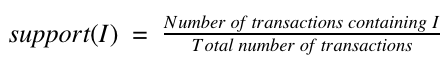

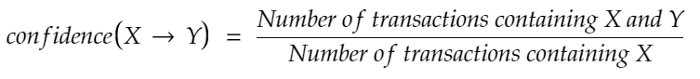

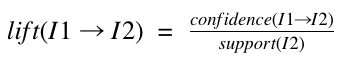

In [ ]:
fifa_experiment = fifa_data

In [ ]:
fifa_experiment = fifa_experiment.drop(columns=['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause', 'League'],axis=1)
fifa_experiment

In [ ]:
for i in fifa_experiment.columns[1:]:
  fifa_experiment[i] = np.where(fifa_experiment[i] > 80, i, 'NaN')
fifa_experiment

In [ ]:
(rows,columns) = fifa_experiment.head(500).shape

In [ ]:
records = []
for i in range(0, rows):
  records.append([str(fifa_experiment.values[i,j]) for j in range(1,columns) if str(fifa_experiment.values[i,j]) != 'NaN' ])

In [ ]:
association_rules = apriori(records,min_confidence=0.7, min_length=3)
association_results = list(association_rules)

Attributes which usually occur together

In [ ]:
for item in association_results:
    pair = item[2][0][0]
    items = [x for x in pair]
    pair1 = item[2][0][1]
    items1 = [x for x in pair1]
    print("Rule: " + str(items[0:]) + " -> " + str(items1[0:]))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

This inspired me to categorise players according to their specialty 

# Player specialities 

**Criterias for various speciality**

**Poacher**: Finishing: 85+ Heading Accuracy: 85+ Attacking Work Rate: Low or Medium

**Distance Shooter**: Long Shots: 87+ Shot Power: 87+

**Clinical Finisher**: Long Shots: 80+ Finishing: 86+

**Aerial Threat**: Heading Accuracy: 75+ Jumping: 85+ Strength: 85+ Player Height: 188cm+

**Free Kick (FK) Specialist**: FK Accuracy: 86+ Curve: 85+ Shot Power: 85+

**Dribbler: Dribbling**: 86+ Balance: 75+

**Playmaker**: Short Passing: 86+ Long Passing: 73+ Vision: 86+

**Crosser: Crossing**: 86+ Curve: 80+

**Engine: Stamina**: 86+ Attacking Work Rate: High Defensive Work Rate: High

**Tackler: Standing Tackle**: 86+ Sliding Tackle: 85+

**Speedster**: Sprint Speed: 90+ Acceleration: 90+

**Strength**: Strength: 86+ Player Weight: 83kg+

**Tactician**: Interceptions: 86+ Reactions: 80+

**Acrobat: Agility**: 86+ Reactions: 80+

**Complete Forward**: Has Poacher Specialty and at least two of the following: Clinical Finisher Specialty Speedster Specialty Aerial Threat Specialty Dribbler Specialty Strength Specialty Or, if they don’t have Poacher, have Clinical Finisher specialty and at least two of the following Speedster Specialty Aerial Threat Specialty Dribbler Specialty Strength Specialty:

**Complete Midfielder**: Has Playmaker Specialty and at least two of the following: Engine Specialty Crosser Specialty Dribbler Specialty Distance Shooter Specialty Free Kick (FK) Specialist Specialty Clinical Finisher Specialty Tackler Specialty

**Complete Defender**: Has Tackler Specialty and at least one of the following: Acrobat Specialty Strength Specialty Aerial Threat Specialty

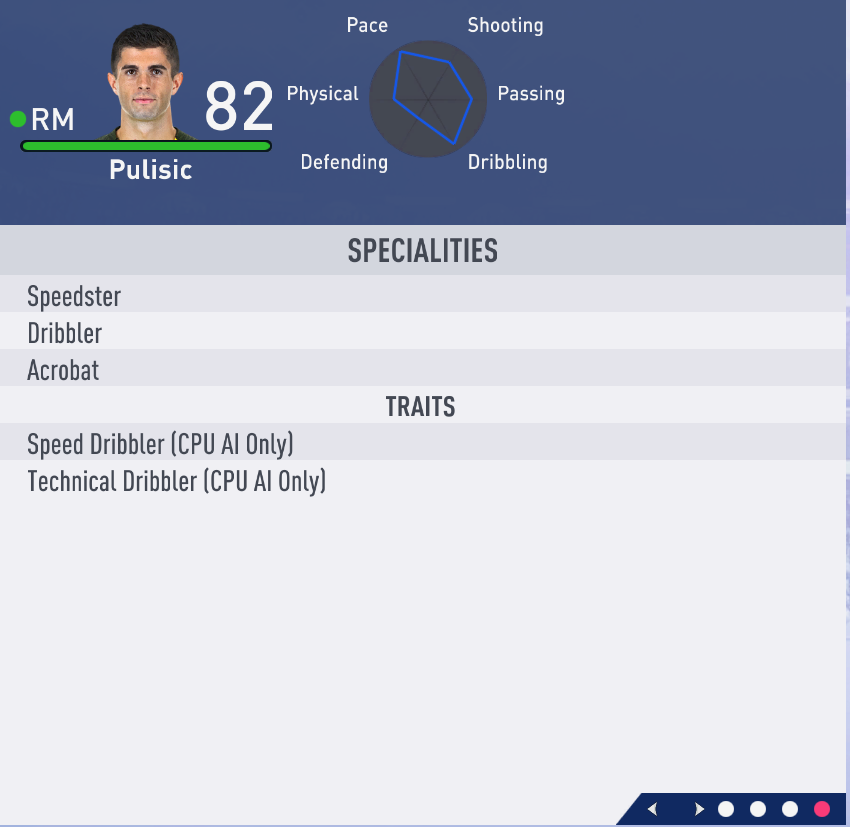

In [ ]:
speciality_conditions = [
    ((((fifa_data['Finishing'] > 85) & (fifa_data['HeadingAccuracy'] > 85) & (fifa_data['Work Rate'] != 'High/ High') & (fifa_data['Work Rate'] != 'High/ Low') & (fifa_data['Work Rate'] != 'High/ Medium')) 
     & (((fifa_data['LongShots'] > 80) & (fifa_data['Finishing'] > 86)) | ((fifa_data['SprintSpeed'] > 90) & (fifa_data['Acceleration'] > 90)) | ((fifa_data['HeadingAccuracy'] > 75) & (fifa_data['Jumping'] > 85) & (fifa_data['Strength'] > 85)) |
        ((fifa_data['Dribbling'] > 86) & (fifa_data['Balance'] > 75)) | ((fifa_data['Strength'] > 86) & (fifa_data['Weight'] > '182lbs')))) | (((fifa_data['LongShots'] > 80) & (fifa_data['Finishing'] > 86)) & 
        (((fifa_data['SprintSpeed'] > 90) & (fifa_data['Acceleration'] > 90)) | ((fifa_data['HeadingAccuracy'] > 75) & (fifa_data['Jumping'] > 85) & (fifa_data['Strength'] > 85)) 
        | ((fifa_data['Dribbling'] > 86) & (fifa_data['Balance'] > 75)) | ((fifa_data['Strength'] > 86) & (fifa_data['Weight'] > '182lbs'))))),
    (((fifa_data['ShortPassing'] > 86) & (fifa_data['LongPassing'] > 73) & (fifa_data['Vision'] > 86)) & (((fifa_data['Stamina'] > 86) & (fifa_data['Work Rate'] == 'High/ High')) 
    | ((fifa_data['Crossing'] > 86) & (fifa_data['Curve'] > 80)) | ((fifa_data['Dribbling'] > 86) & (fifa_data['Balance'] > 75)) | ((fifa_data['LongShots'] > 87) & (fifa_data['ShotPower'] > 87)) 
    | ((fifa_data['FKAccuracy'] > 86) & (fifa_data['Curve'] > 85) & (fifa_data['ShotPower'] > 85)) | ((fifa_data['LongShots'] > 80) & (fifa_data['Finishing'] > 86)) 
    | ((fifa_data['StandingTackle'] > 86) & (fifa_data['SlidingTackle'] > 85)))),
    (((fifa_data['StandingTackle'] > 86) & (fifa_data['SlidingTackle'] > 85)) & (((fifa_data['Agility'] > 86) & (fifa_data['Reactions'] > 80)) | ((fifa_data['Strength'] > 86) & (fifa_data['Weight'] > '182lbs')) 
    | ((fifa_data['HeadingAccuracy'] > 75) & (fifa_data['Jumping'] > 85) & (fifa_data['Strength'] > 85)))),
    (fifa_data['Finishing'] > 85) & (fifa_data['HeadingAccuracy'] > 85) & (fifa_data['Work Rate'] != 'High/ High') & (fifa_data['Work Rate'] != 'High/ Low') & (fifa_data['Work Rate'] != 'High/ Medium'),
    (fifa_data['LongShots'] > 87) & (fifa_data['ShotPower'] > 87),
    (fifa_data['LongShots'] > 80) & (fifa_data['Finishing'] > 86),
    (fifa_data['HeadingAccuracy'] > 75) & (fifa_data['Jumping'] > 85) & (fifa_data['Strength'] > 85), 
    (fifa_data['FKAccuracy'] > 86) & (fifa_data['Curve'] > 85) & (fifa_data['ShotPower'] > 85),
    (fifa_data['Dribbling'] > 86) & (fifa_data['Balance'] > 75),
    (fifa_data['ShortPassing'] > 86) & (fifa_data['LongPassing'] > 73) & (fifa_data['Vision'] > 86),
    (fifa_data['Crossing'] > 86) & (fifa_data['Curve'] > 80),
    (fifa_data['Stamina'] > 86) & (fifa_data['Work Rate'] == 'High/ High'),
    (fifa_data['StandingTackle'] > 86) & (fifa_data['SlidingTackle'] > 85),
    (fifa_data['SprintSpeed'] > 90) & (fifa_data['Acceleration'] > 90),
    (fifa_data['Strength'] > 86) & (fifa_data['Weight'] > '182lbs'),
    (fifa_data['Interceptions'] > 86) & (fifa_data['Reactions'] > 80),
    (fifa_data['Agility'] > 86) & (fifa_data['Reactions'] > 80),
    (fifa_data['Position'] == 'GK')
    

    ]

speciality_values = ['Complete Forward', 'Complete Midfielder', 'Complete Defender', 'Poacher', 'Distance Shooter', 'Clinical Finisher', 'Aerial Threat', 'Free Kick Specialist', 'Dribbler', 'Playmaker', 'Crosser', 'Engine', 
                     'Tackler', 'Speedster', 'Strength', 'Tactician', 'Acrobat', 'Goalkeeper'  ]

fifa_data['Speciality'] = np.select(speciality_conditions, speciality_values)

In [ ]:
fifa_data

No. of players with different specialty

In [ ]:
fifa_data['Speciality'].value_counts()

In [ ]:
fifa_data['Speciality'] = np.where((fifa_data.Speciality == '0'), 'No Speciality', fifa_data.Speciality)

Specialty graph

In [ ]:
speciality_count = fifa_data['Speciality'].value_counts()
speciality_count = speciality_count[2:]
plt.figure(figsize=(25,5))
g = sns.barplot(speciality_count.index, speciality_count.values, alpha = 0.8)
plt.title('Player Speciality')
plt.ylabel('Number of Players', fontsize=12)
plt.xlabel('Speciality', fontsize=12)
plt.xticks(rotation=45)

# Clustering

* Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups
* K means is an iterative clustering algorithm that aims to find local maxima in each iteration

Finding the number of clusters we need

In [ ]:
el1 =[]
for i in range (1,8):
  kmeans = KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(fifa_data.iloc[:,[3]])
  el1.append(kmeans.inertia_)
plt.plot(range (1,8),el1)
plt.title("Elbow")
plt.xlabel("Overall") 
plt.show()

In [ ]:
el2 =[]
for i in range (1,8):
  kmeans = KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(fifa_data.iloc[:,[4]])
  el2.append(kmeans.inertia_)
plt.plot(range (1,8),el2)
plt.title("Elbow")
plt.xlabel("Potential") 
plt.show()

Required clusters

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(fifa_data.iloc[:,[4,3]])
clust = pd.DataFrame(kmeans.cluster_centers_, columns = list(fifa_data.iloc[:,[4,3]].columns.values))
fig, ax = plt.subplots(1,1)
fifa_data.plot.scatter(x='Overall', y='Potential',c=kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax,mark_right=False  )
clust.plot.scatter(x='Overall', y='Potential', ax=ax, s=80, mark_right=False)

# Classification

* Classification refers to a predictive modeling problem where a class label is predicted for a given example of input data
* Classification requires a training dataset with many examples of inputs and outputs from which to learn
* A model will use the training dataset and will calculate how to best map examples of input data to specific class labels
* Classification predictive modeling algorithms are evaluated based on their results
* Classification accuracy is a popular metric used to evaluate the performance of a model based on the predicted class labels

In [ ]:
feat_col = ['Age', 'Overall', 'Potential','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes' ]
X = fifa_data[feat_col]                  #feat values
y = fifa_data.Speciality                 #Target Variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Predicting player specialty

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)       #Training
y_pred = clf.predict(X_test)          #Predicting target variable 
print(y_pred)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Coach's player potential guide

Checking a players current rating amd potential to find scope of improvement

In [ ]:
def player_pot(club_name):
  sns.set(style="whitegrid")
  f, ax = plt.subplots(figsize=(6, 16))

  sns.set_color_codes("pastel")
  sns.barplot(x="Potential", y="Name", data=fifa_data.loc[fifa_data['Club'] == club_name],
            label="Potential", color="b")
  sns.set_color_codes("muted")
  sns.barplot(x="Overall", y="Name", data=fifa_data.loc[fifa_data['Club'] == club_name],
            label="Overall", color="b")


  ax.legend(ncol=2, bbox_to_anchor=(1.75, 0.5),frameon=True)

Select any club to see all the players along with their overall and potential

In [ ]:
interact(player_pot, club_name = fifa_data.Club)

Callum Hudson-Odoi at the start of first season

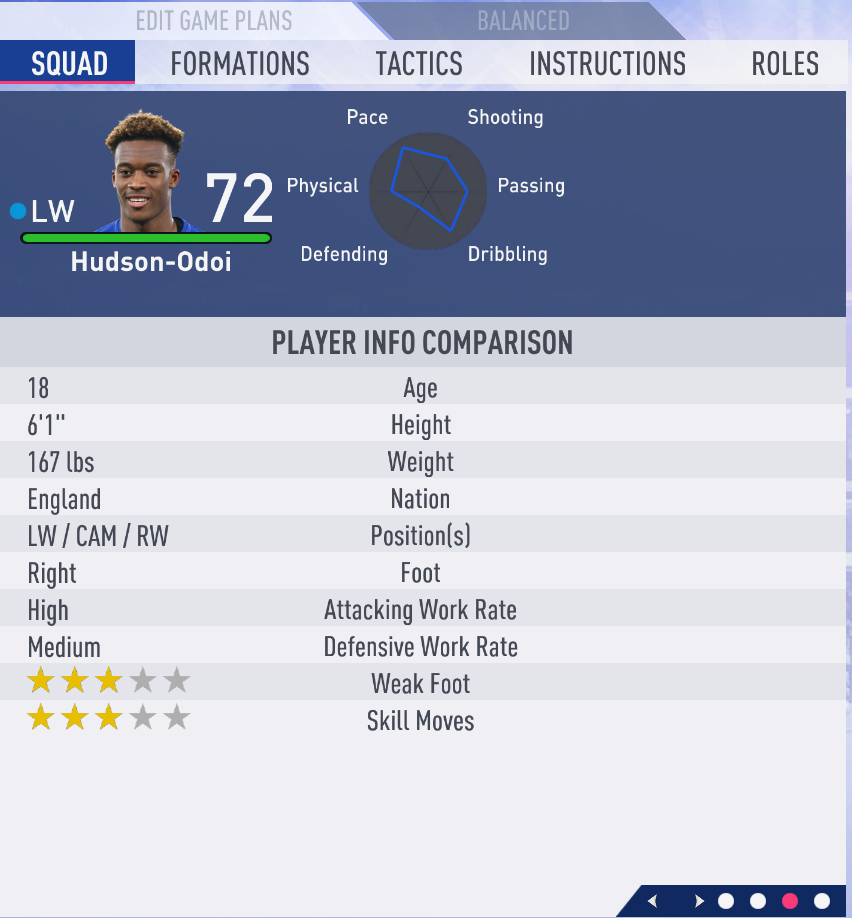

Callum Hudson-Odoi after a few seasons fulfilling his potential

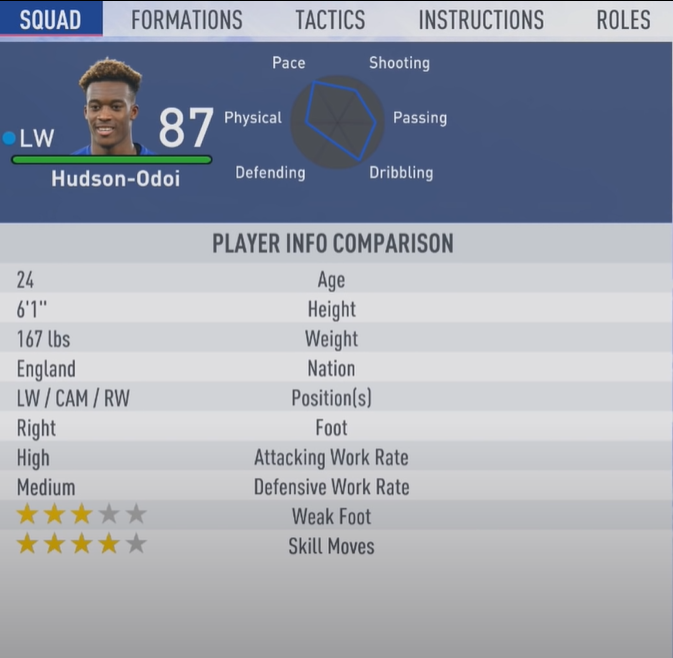

# Player Scouting

Scouting is the process of evaluating the talent of footballers with a view to sign them.
Sometimes scouting can be an expensive process and finding replacement for players isn't easy either.

In [ ]:
normalized_data = fifa_data

In [ ]:
normalized_data = normalized_data.drop(columns=['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Release Clause', 'League','Height', 'Weight', 'Speciality', 'Name', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1)

Normalizing data

In [ ]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(normalized_data)
normalized_data.loc[:,:] = scaled_values
normalized_data['Name'] = fifa_data['Name']
col_name = "Name"
first_col = normalized_data.pop(col_name)
normalized_data.insert(0, col_name, first_col)
normalized_data

**Finding similar players on the basis of various attributes**

In [ ]:
def get_similar_players(player_name):
  player_index = [list(normalized_data['Name']).index(x) for x in list(normalized_data['Name']) if player_name in x]
  player_index = int(player_index[0])
  # print(player_index)
  df = normalized_data.iloc[:,1:]
  cos = cosine_similarity(df, df)
  player_cos = sorted(list(cos[player_index]))[-4:-1]
  indexes = [list(cos[player_index]).index(x) for x in player_cos]
  indexes.append(player_index)
  plot_df = normalized_data.iloc[indexes]
  plot_df1 = plot_df
  plot_df1.reset_index(drop=True, inplace=True)
  plot_df1.reindex(index=range(0,5))
  plot_categories = list(plot_df1)[1:]
  plot_values = plot_df1.mean().values.flatten().tolist()
  plot_values += values[:1]
  angles = [n/ float(len(plot_categories)) *2 * pi for n in range(len(plot_categories))]
  angles += angles[:1]
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10),subplot_kw=dict(polar=True))
  plt.xticks(angles[:-1], plot_categories, color='grey', size=12)
  plt.yticks(np.arange(0.0, 1.2,0.2), ['0', '20','40','60','80','100'],color='grey', size=12)
  plt.ylim(0, 1)
  ax.set_rlabel_position(30)
  for i in range(len(plot_df1)):
    val_c1 = plot_df1.loc[i].drop('Name').values.flatten().tolist()
    val_c1 += val_c1[:1]
    ax.plot(angles, val_c1, linewidth=1.5, linestyle='solid',label=plot_df1.loc[i]["Name"])
    ax.fill(angles, val_c1, alpha=0.1)
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
  return player_cos, normalized_data.iloc[indexes], plt.show()

Select any player from the dropdown to find 3 similar players. This can be helpful while finding replacement for a player.

(Very helpful for FIFA 19 career mode aswell 😝)

In [ ]:
interact(get_similar_players, player_name = normalized_data.Name)

***If you made it this far, Please upvote the kernel if you like it. It motivates me to make more quality content.*** 

<img src="https://i2-prod.mirror.co.uk/incoming/article13565233.ece/ALTERNATES/s615b/1_Ligue-1-Paris-St-Germain-v-Angers.jpg">
